<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 756.2 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit
from google.colab import files


In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1642, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 1642 (delta 150), reused 17 (delta 17), pack-reused 1411 (from 1)
Receiving objects: 100% (1642/1642), 114.16 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (972/972), done.
Updating files: 100% (196/196), done.


'/content'

In [4]:
%cd "/content/gator/data/"

/content/gator/data


# EIS

In [5]:
def nyquist_and_fit(filename):
  freqs, Z = preprocessing.readZPlot(filename)

  circuit = 'p(R0-W0,C0)'
  init = [10**6, 10**-7, 10**-8]

  circuit = CustomCircuit(circuit, initial_guess=init)
  circuit.fit(freqs, Z)
  Z_fit = circuit.predict(freqs)

  data = plt.plot(Z.real, -Z.imag, '.')
  plt.plot(Z_fit.real, -Z_fit.imag, '-', color=data[0].get_color())

  print(circuit)

/content/gator/data

Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.15e+06  (+/- 6.90e-24) [Ohm]
     W0 = 2.45e+05  (+/- 1.56e-24) [Ohm sec^-1/2]
     C0 = 5.62e-12  (+/- 3.34e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.19e+07  (+/- 1.04e-24) [Ohm]
     W0 = 5.44e+06  (+/- 3.15e-25) [Ohm sec^-1/2]
     C0 = 1.86e-11  (+/- 7.09e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 9.69e+06  (+/- 1.47e-24) [Ohm]
     W0 = 4.24e+06  (+/- 5.13e-25) [Ohm sec^-1/2]
     C0 = 2.98e-11  (+/- 7.69e-10) [F]


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

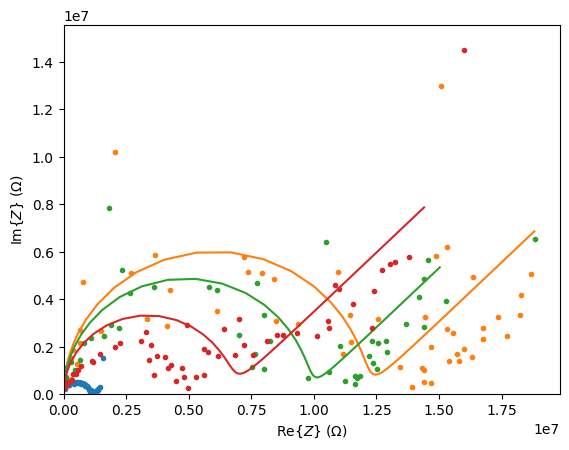

In [6]:
%cd "/content/gator/data/"
nyquist_and_fit('06-20/LiTao3_htol.z')
nyquist_and_fit('06-24/LiTao3_Blue.z')
nyquist_and_fit('06-24/LiTao3_Blackltoh.z')
nyquist_and_fit('07-30/GY1_htol.z')
plt.ylim(0)
plt.xlim(0)
plt.ylabel('$\mathrm{Im}\{ Z \} \;(\Omega)$')
plt.xlabel('$\mathrm{Re}\{ Z \} \;(\Omega)$')

plt.savefig('eis_big.svg')
files.download('eis_big.svg')


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.15e+06  (+/- 6.90e-24) [Ohm]
     W0 = 2.45e+05  (+/- 1.56e-24) [Ohm sec^-1/2]
     C0 = 5.62e-12  (+/- 3.34e-10) [F]



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

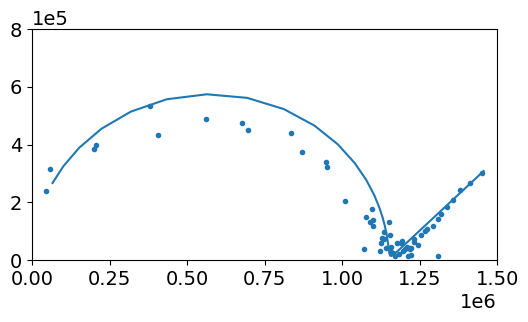

In [26]:
plt.figure(figsize=(6,3))
plt.rcParams.update({'font.size': 14})
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
nyquist_and_fit('06-20/LiTao3_htol.z')
plt.ylim(0,0.8e6)
plt.xlim(0,1.5e6)
plt.savefig('eis_inset.svg')
files.download('eis_inset.svg')


In [8]:
def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [19]:
L = 0.002 # (m)

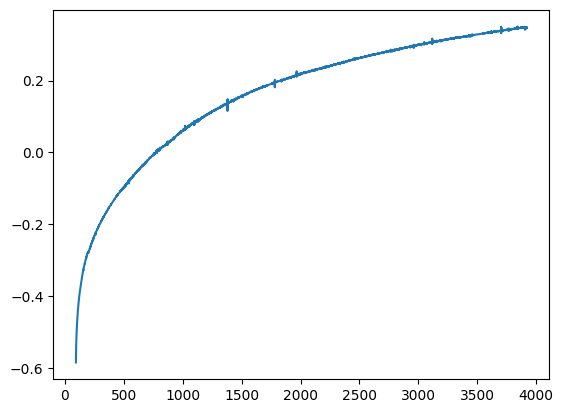

The inverse time constant is -6.49e-04s.
Diffusivity is -8.157067763523557e-09 m^2/s.
The intercept is -3.81e-01.
The inverse time constant is -1.16e-04s.
Diffusivity is -1.4603936438423049e-09 m^2/s.
The intercept is -1.42e-02.
The inverse time constant is -4.23e-04s.
Diffusivity is -5.320290077972086e-09 m^2/s.
The intercept is -2.70e-01.


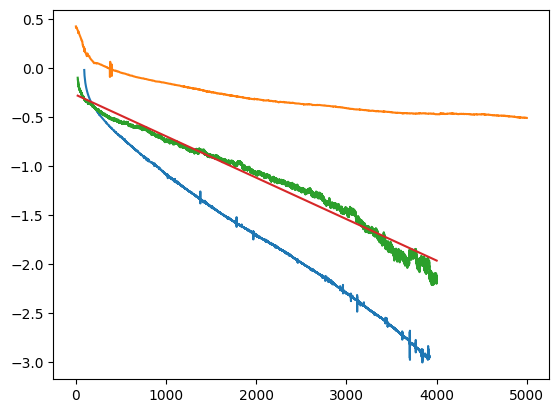

In [21]:
# GY1 fresh

# prep_csv('07-31/defbuffer1_0731_152436.csv')
df = pd.read_csv('07-31/defbuffer1_0731_152436.csv')

T = df['Relative Time'].values
V = df['Reading'].values

T_trunc = T[T>92.6]
V_trunc = V[T>92.6]
plt.plot(T_trunc, V_trunc)
plt.show()

Vinf = 0.4
Vlin = np.log(Vinf * np.ones_like(V_trunc) - V_trunc)
plt.plot(T_trunc, Vlin)

tinv, cept = np.polyfit(T_trunc,Vlin,1)
print(f'The inverse time constant is {tinv:.2e}s.')
print(f'Diffusivity is {np.pi*L**2 * tinv} m^2/s.')
print(f'The intercept is {cept:.2e}.')

# GY1 old

# prep_csv('/content/gator/data/07-31/defbuffer1_0806_084616.csv')
df = pd.read_csv('/content/gator/data/07-31/defbuffer1_0806_084616.csv')

T = df['Relative Time'].values
V = df['Reading'].values

T,V = T[T<5000], V[T<5000]

Vinf = -1.33
Vlin = np.log(V - Vinf * np.ones_like(V))
plt.plot(T, Vlin)

tinv, cept = np.polyfit(T,Vlin,1)
print(f'The inverse time constant is {tinv:.2e}s.')
print(f'Diffusivity is {np.pi*L**2 * tinv} m^2/s.')
print(f'The intercept is {cept:.2e}.')

# 0620

# prep_csv('06-20/polarization.csv')
df = pd.read_csv('06-20/polarization.csv')

T = df['Relative Time'].values
V = df['Reading'].values
Vinf = np.mean(V[-500:])
V_flipped = Vinf * np.ones_like(T) - V

T_trunc = T[(T > 20) & (T < 4000)]
V_trunc = V_flipped[(T > 20) & (T < 4000)]

tinv, cept = np.polyfit(T_trunc,np.log(V_trunc),1)
print(f'The inverse time constant is {tinv:.2e}s.')
print(f'Diffusivity is {np.pi*L**2 * tinv} m^2/s.')
print(f'The intercept is {cept:.2e}.')
plt.plot(T_trunc,np.log(V_trunc))
plt.plot(T_trunc,cept*np.ones_like(T_trunc)+tinv*T_trunc)


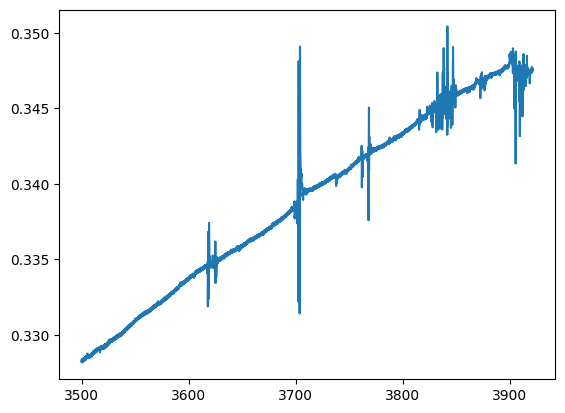

In [11]:
# GY1 fresh

# prep_csv('07-31/defbuffer1_0731_152436.csv')
df = pd.read_csv('07-31/defbuffer1_0731_152436.csv')

T = df['Relative Time'].values
V = df['Reading'].values

T_trunc = T[T>3500]
V_trunc = V[T>3500]
plt.plot(T_trunc, V_trunc)
plt.show()



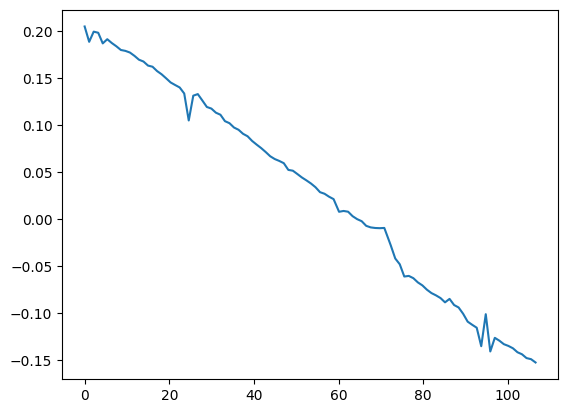

In [16]:
# GY1 old

# prep_csv('/content/gator/data/07-31/defbuffer1_0806_084616.csv')
df = pd.read_csv('/content/gator/data/07-31/defbuffer1_0806_084616.csv')

T = df['Relative Time'].values
V = df['Reading'].values

T,V = T[T<5000], V[T<5000]


plt.plot(T[:100],V[:100])